# **Lab 05: Image Segmentation using Thresholding Techniques**

# Name: Waleed Usman
## Nutech id: F22607011
### AI_22

## Lab Tasks

### 1. Simple Thresholding

In [2]:
#importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

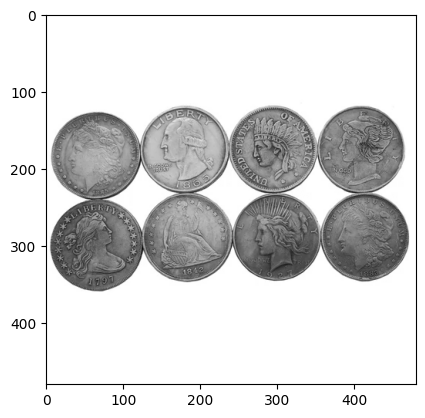

In [7]:
# Load the image
image_path="/content/Replica-US-Dollar-Coins-8-Piece-Set_1_480x480.webp"
image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

In [14]:
# Apply simple thresholding
_, binary_thresh = cv2.threshold(image, 225, 255, cv2.THRESH_BINARY)

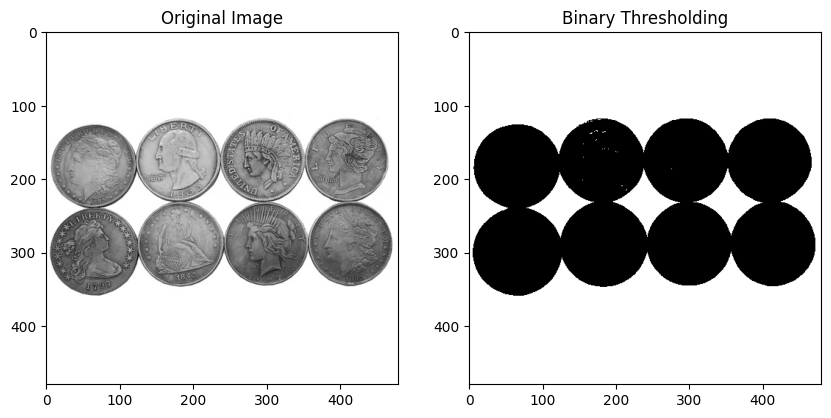

In [15]:
# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(binary_thresh, cmap='gray'), plt.title('Binary Thresholding')
plt.show()

### 2. Adaptive Thresholding

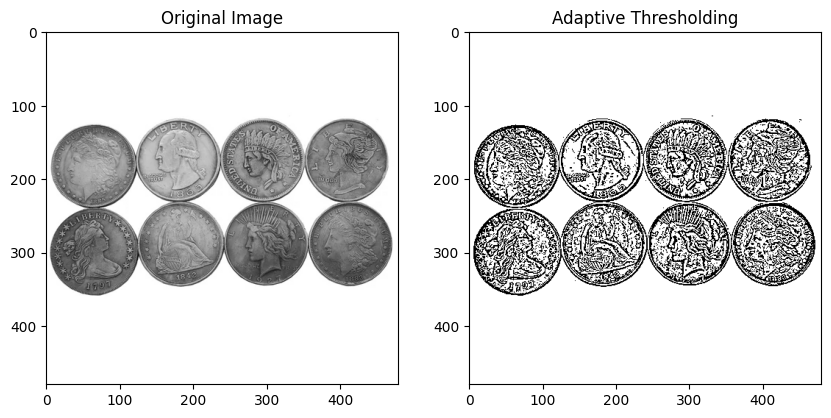

In [17]:
# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(adaptive_thresh, cmap='gray'), plt.title('Adaptive Thresholding')
plt.show()

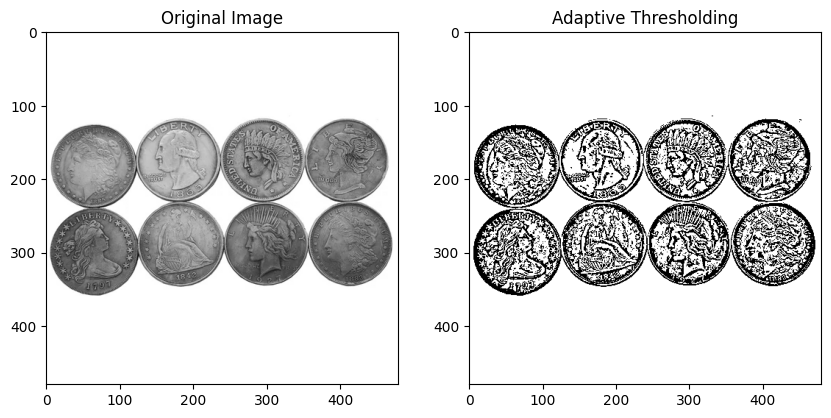

In [30]:
# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(image, 255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, 2)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(adaptive_thresh, cmap='gray'), plt.title('Adaptive Thresholding')
plt.show()

### 3. Otsu’s Thresholding

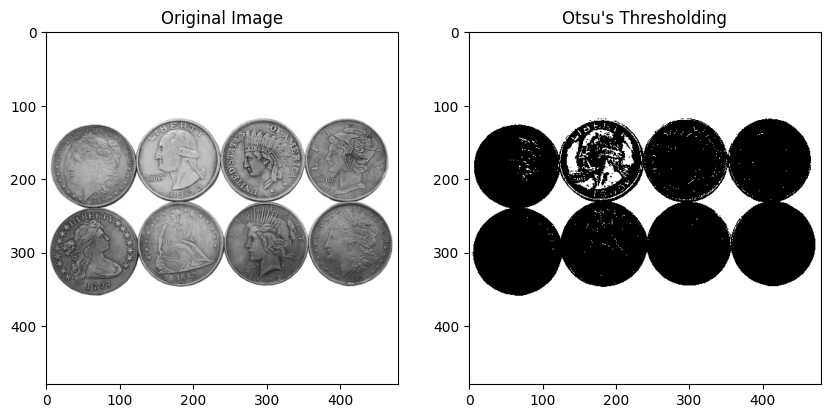

In [31]:
# Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(otsu_thresh, cmap='gray'), plt.title("Otsu's Thresholding")
plt.show()

### 4. Watershed Segmentation

In [77]:
image_path2="/content/Screenshot 2025-03-17 083520.png"
# Load the image in color mode
image_color = cv2.imread(image_path2)
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

In [78]:
# Apply thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV +
cv2.THRESH_OTSU)

In [93]:
# Remove noise using morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [94]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

In [95]:
# Markers
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

In [96]:
# Apply watershed

cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 0, 255]

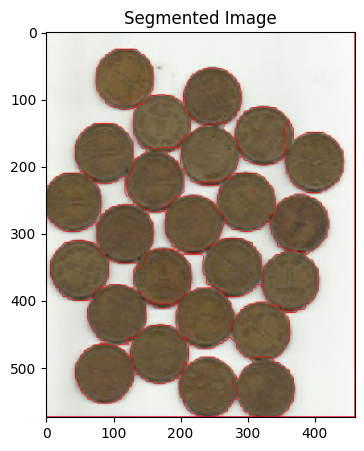

In [97]:
# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)),
plt.title('Segmented Image')
plt.show()

### Applying Same threshold multiple time

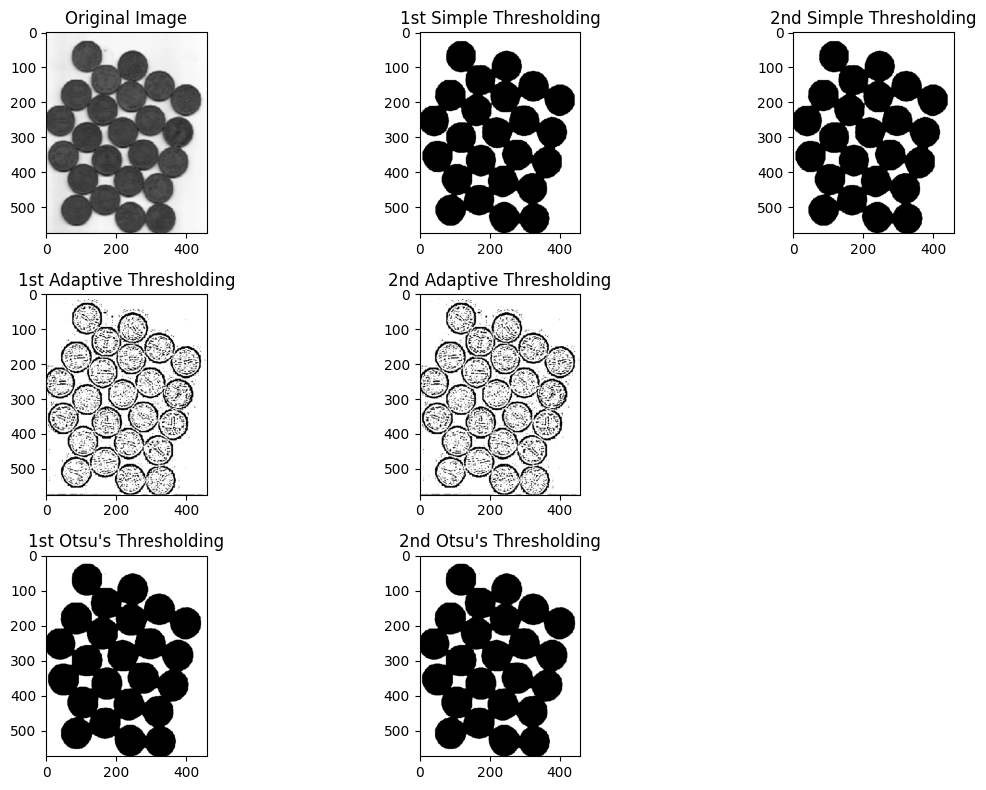

Simple Thresholding - Are results identical? True
Adaptive Thresholding - Are results identical? True
Otsu's Thresholding - Are results identical? True


In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("/content/Screenshot 2025-03-17 083520.png", cv2.IMREAD_GRAYSCALE)

# Apply Simple Thresholding (First Time)
_, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Apply Simple Thresholding (Second Time on thresh1)
_, thresh2 = cv2.threshold(thresh1, 127, 255, cv2.THRESH_BINARY)

# Apply Adaptive Thresholding (First Time)
adaptive_thresh1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Adaptive Thresholding (Second Time on adaptive_thresh1)
adaptive_thresh2 = cv2.adaptiveThreshold(adaptive_thresh1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Otsu's Thresholding (First Time)
_, otsu_thresh1 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply Otsu's Thresholding (Second Time on otsu_thresh1)
_, otsu_thresh2 = cv2.threshold(otsu_thresh1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Compare results
plt.figure(figsize=(12, 8))

plt.subplot(3,3,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(3,3,2), plt.imshow(thresh1, cmap='gray'), plt.title('1st Simple Thresholding')
plt.subplot(3,3,3), plt.imshow(thresh2, cmap='gray'), plt.title('2nd Simple Thresholding')

plt.subplot(3,3,4), plt.imshow(adaptive_thresh1, cmap='gray'), plt.title('1st Adaptive Thresholding')
plt.subplot(3,3,5), plt.imshow(adaptive_thresh2, cmap='gray'), plt.title('2nd Adaptive Thresholding')

plt.subplot(3,3,7), plt.imshow(otsu_thresh1, cmap='gray'), plt.title("1st Otsu's Thresholding")
plt.subplot(3,3,8), plt.imshow(otsu_thresh2, cmap='gray'), plt.title("2nd Otsu's Thresholding")

plt.tight_layout()
plt.show()

# Check if applying thresholding twice makes any difference
print("Simple Thresholding - Are results identical?", np.array_equal(thresh1, thresh2))
print("Adaptive Thresholding - Are results identical?", np.array_equal(adaptive_thresh1, adaptive_thresh2))
print("Otsu's Thresholding - Are results identical?", np.array_equal(otsu_thresh1, otsu_thresh2))


## Student Tasks

### Task 1: Experiment with Different Threshold Values in Simple Thresholding

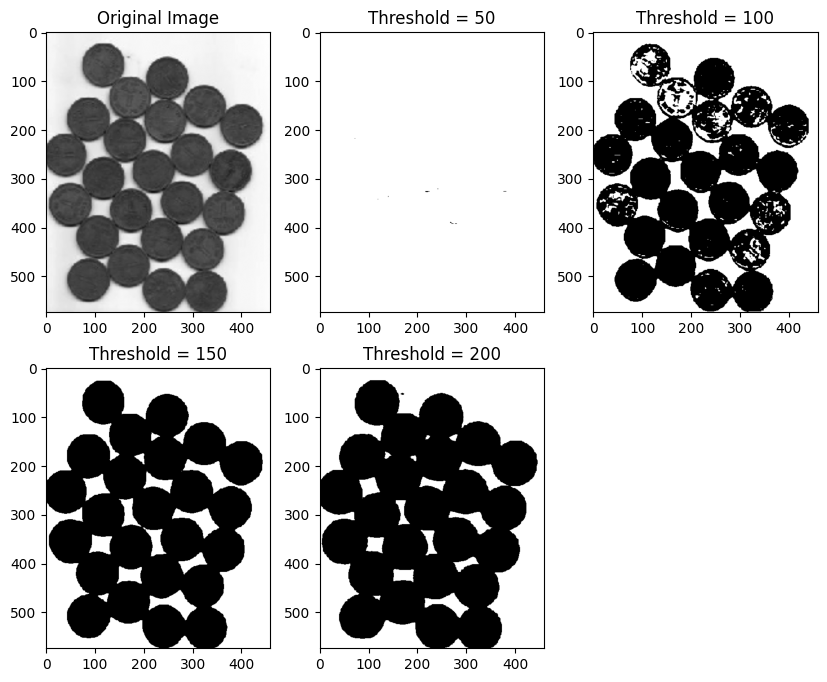

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

# Apply simple thresholding with different values
threshold_values = [50, 100, 150, 200]
binary_thresh = [cv2.threshold(image, t, 255, cv2.THRESH_BINARY)[1] for t in threshold_values]

# Display results
plt.figure(figsize=(10,8))
plt.subplot(2,3,1), plt.imshow(image, cmap='gray'), plt.title('Original Image')

for i, t in enumerate(threshold_values):
    plt.subplot(2,3,i+2), plt.imshow(binary_thresh[i], cmap='gray'), plt.title(f'Threshold = {t}')

plt.show()


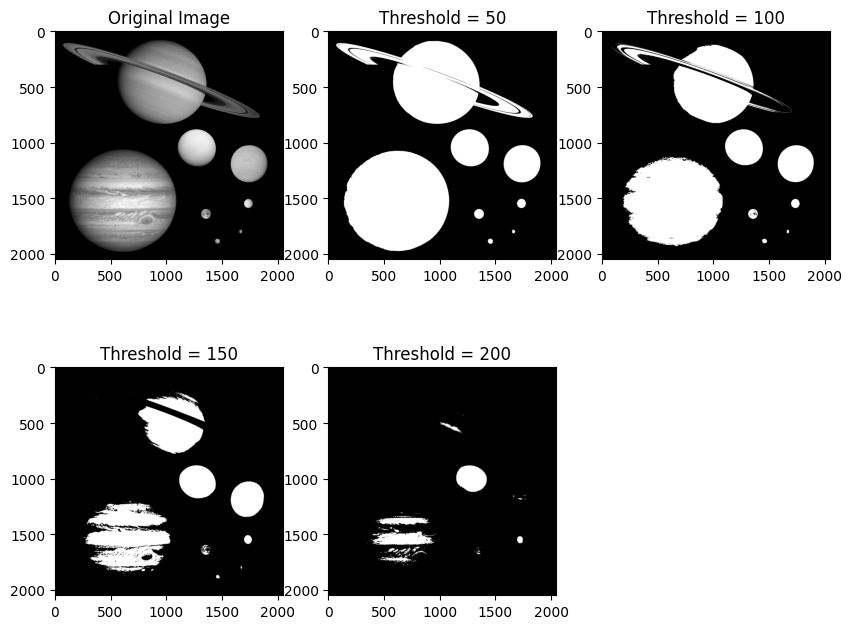

In [100]:
# Same threshold on diferent image
image_path3="/content/Planet_collage_to_scale.jpg"

image2 = cv2.imread(image_path3, cv2.IMREAD_GRAYSCALE)

# Apply simple thresholding with different values
threshold_values = [50, 100, 150, 200]
binary_thresh = [cv2.threshold(image2, t, 255, cv2.THRESH_BINARY)[1] for t in threshold_values]

# Display results
plt.figure(figsize=(10,8))
plt.subplot(2,3,1), plt.imshow(image2, cmap='gray'), plt.title('Original Image')

for i, t in enumerate(threshold_values):
    plt.subplot(2,3,i+2), plt.imshow(binary_thresh[i], cmap='gray'), plt.title(f'Threshold = {t}')

plt.show()

### Task 2: Change Block Size and C in Adaptive Thresholding

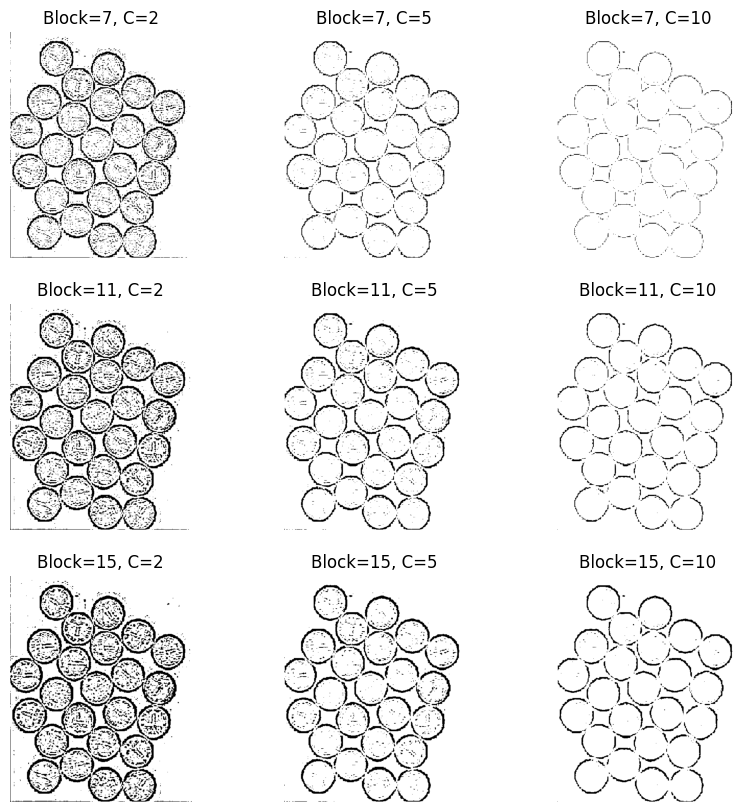

In [101]:
# Apply adaptive thresholding with different block sizes and C values
block_sizes = [7, 11, 15]
C_values = [2, 5, 10]

fig, axes = plt.subplots(len(block_sizes), len(C_values), figsize=(10,10))

for i, block in enumerate(block_sizes):
    for j, C in enumerate(C_values):
        adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                cv2.THRESH_BINARY, block, C)
        axes[i, j].imshow(adaptive_thresh, cmap='gray')
        axes[i, j].set_title(f'Block={block}, C={C}')
        axes[i, j].axis('off')

plt.show()

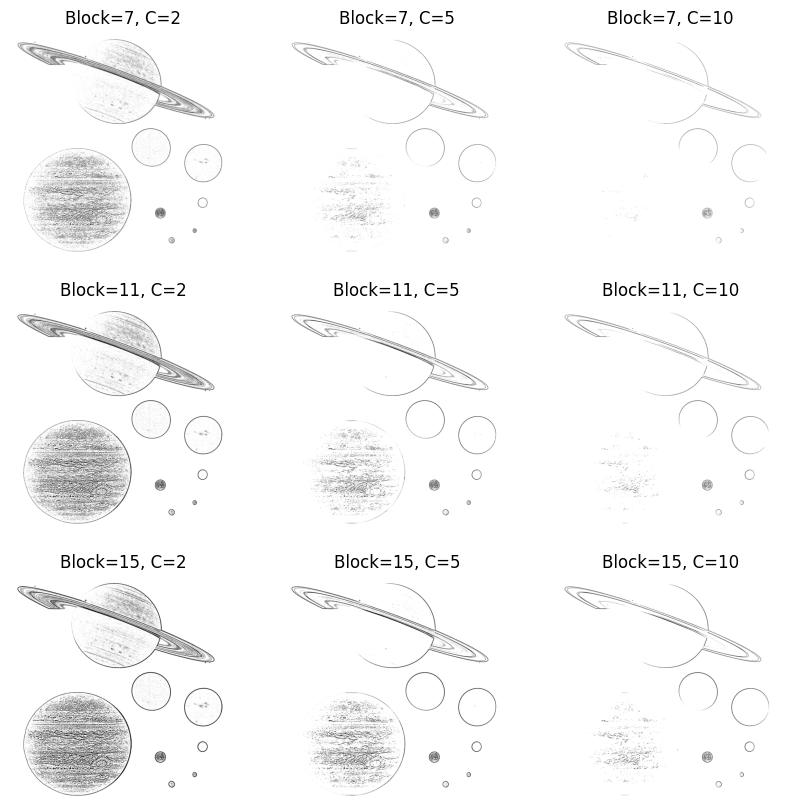

In [102]:
# Apply adaptive thresholding with different block sizes and C values
block_sizes = [7, 11, 15]
C_values = [2, 5, 10]

fig, axes = plt.subplots(len(block_sizes), len(C_values), figsize=(10,10))

for i, block in enumerate(block_sizes):
    for j, C in enumerate(C_values):
        adaptive_thresh = cv2.adaptiveThreshold(image2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                cv2.THRESH_BINARY, block, C)
        axes[i, j].imshow(adaptive_thresh, cmap='gray')
        axes[i, j].set_title(f'Block={block}, C={C}')
        axes[i, j].axis('off')

plt.show()

### Task 3: Apply Otsu's Method on Different Images and Compare Results

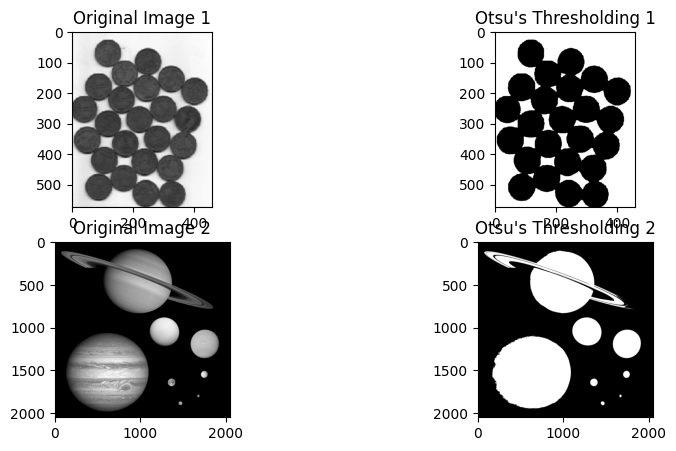

In [103]:
# Apply Otsu's thresholding
_, otsu_thresh1 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, otsu_thresh2 = cv2.threshold(image2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(2,2,1), plt.imshow(image, cmap='gray'), plt.title('Original Image 1')
plt.subplot(2,2,2), plt.imshow(otsu_thresh1, cmap='gray'), plt.title("Otsu's Thresholding 1")
plt.subplot(2,2,3), plt.imshow(image2, cmap='gray'), plt.title('Original Image 2')
plt.subplot(2,2,4), plt.imshow(otsu_thresh2, cmap='gray'), plt.title("Otsu's Thresholding 2")
plt.show()

### Task 4: Try Watershed Segmentation on an Image with Multiple Objects

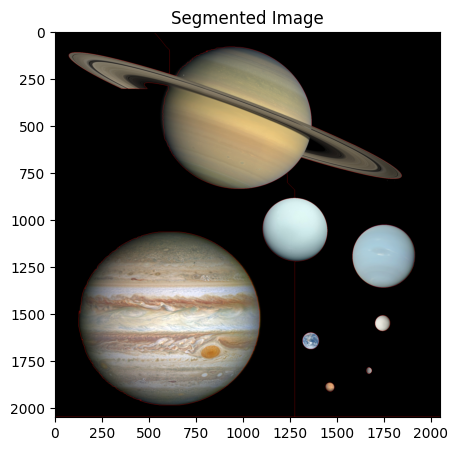

In [111]:
# Load the image
image_color = cv2.imread("/content/Planet_collage_to_scale.jpg")
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Background and foreground markers
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Markers
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 0, 255]  # Mark boundaries in red

# Display results
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)), plt.title('Segmented Image')
plt.show()


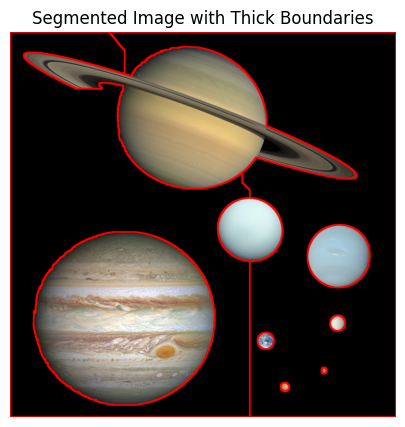

In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_color = cv2.imread("/content/Planet_collage_to_scale.jpg")
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Background and foreground markers
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Markers
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
cv2.watershed(image_color, markers)

# Make the boundary thick by dilation
boundary_mask = np.uint8(markers == -1)  # Extract boundary pixels
kernel_thick = np.ones((5,5), np.uint8)  # Larger kernel for thicker borders
thick_boundary = cv2.dilate(boundary_mask, kernel_thick, iterations=2)  # Dilation to thicken boundaries

# Apply thick boundary (color it red)
image_color[thick_boundary == 1] = [0, 0, 255]  # Red color

# Display results
plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)), plt.title('Segmented Image with Thick Boundaries')
plt.axis("off")
plt.show()


### **Task 5: Comparison of Techniques**

| **Technique**             | **Pros**                                       | **Cons**                                    |
|--------------------------|-----------------------------------------------|--------------------------------------------|
| **Simple Thresholding**   | Fast and easy to implement                    | Requires a manually chosen threshold      |
| **Adaptive Thresholding** | Works well under varying lighting             | Block size and C need tuning              |
| **Otsu’s Thresholding**   | Automatically finds optimal threshold         | May fail in non-bimodal histograms        |
| **Watershed Segmentation** | Excellent for separating overlapping objects | Requires preprocessing and marker tuning  |

## **Conclusion**
- **Simple thresholding** is useful for well-lit, high-contrast images.  
- **Adaptive thresholding** works best when lighting conditions vary across the image.  
- **Otsu’s thresholding** is great when the image has a clear foreground and background.  
- **Watershed segmentation** is the most advanced, ideal for separating touching objects.  
